# ODE Tutorial

A tutorial on using `scipy` to solve systmes of ODEs  

Based on [this chapter](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.06-Python-ODE-Solvers.html) of the [Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html) book

The way we use the solver to solve the differential equation is: `solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)`

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# plt.style.use('seaborn-poster')

%matplotlib inline

In [7]:
F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

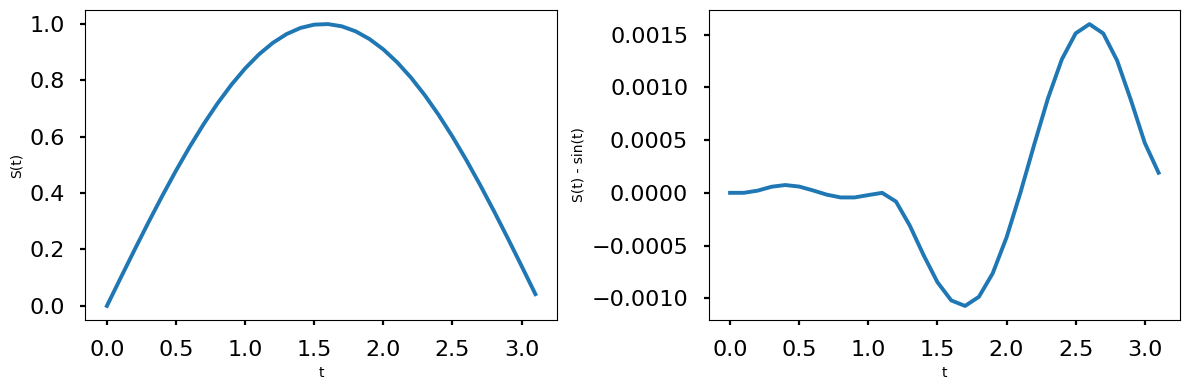

In [8]:
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()